# Business understanding 

- These days AI is integrated into many sectors and industries to make enhancements to the processes involved in those sectors, and Real State is one of them.

#### Using house prices dataset from kaggle we will answer 3 main questions using data analysis and visualizations
- What are the most features affecting the house price?
- On average which Neighborhood has the highest price and which one has the lowest?
- What is the trend of the house pricing with respect to the YearBuilt feature?

# Import liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Gather Data

In [2]:
df=pd.read_csv("data.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Overview

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Before cleaning phase, lets get columns having null values more than 40% of its length

In [5]:
df.columns[df.isnull().sum() / len(df) > 0.4]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
#here I will drop those columns because they exced our threshold which is 40%
#execpt 'PoolQC' becuse its nulls means that there is no pool

df.drop(['Alley', 'FireplaceQu', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# Data Cleaning 

In [7]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
        # Drop rows with missing salary values
    df = df.dropna(subset=['SalePrice'], axis=0)
    #y = df['SalePrice']
    
    #Drop respondent and expected salary columns
    #df = df.drop('SalePrice', axis=1)
    
    # Fill numeric columns with the median to avoid outliers
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].median()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    #X = df
    
    return df
    
#Use the function to create X and y
modified_df = clean_data(df)    

## Q1: What are the most features affecting the house price?

In [8]:
# here I will get the first 10 most correlated features to the target
most_corr_columns = modified_df.corr()['SalePrice'].sort_values(ascending = False)[:10].index
modified_df.corr()['SalePrice'].sort_values(ascending = False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

# Data Visualization 

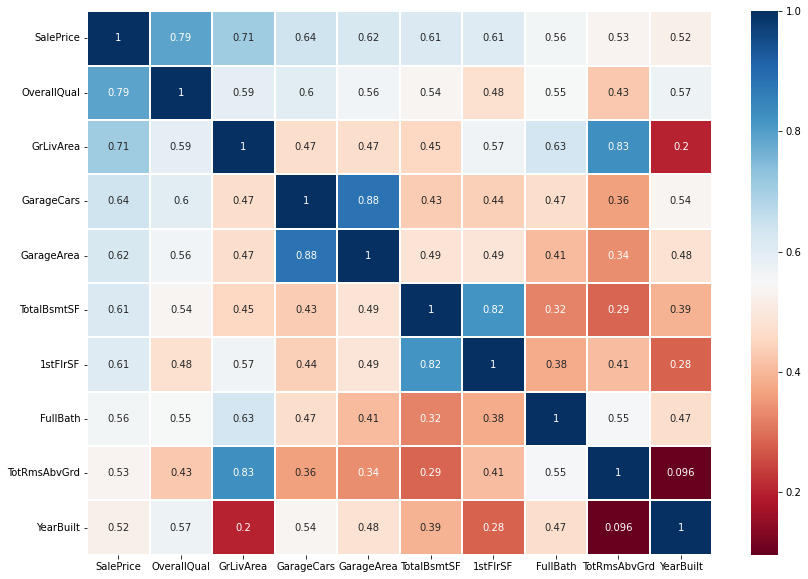

In [9]:
# here I did a heatmap to visualize the correlaion between the features 
plt.figure(figsize = (14,10))
sns.heatmap(modified_df[most_corr_columns].corr(),annot=True,linewidths=0.1,  cmap= 'RdBu');

- From the figure, we observe that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and YearBuilt are the highest correlated features to the target variable which is Price.

## Q2: On average which Neighborhood has the highest price and which one has the lowest?


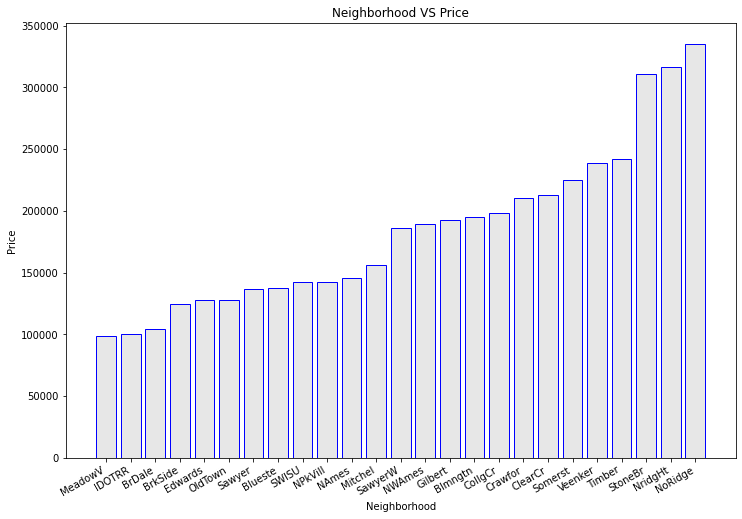

In [10]:
# using bar chart, I will explore which Neighborhood has the highest price and which one is the lowest  
plt.figure(figsize = (12, 8))
col = 'Neighborhood'

temp = df[df[col].isin((df[col].value_counts()).index)][[col,'SalePrice']]
temp= temp.groupby(col).mean().sort_values('SalePrice').reset_index()
plt.ylabel('Price')
plt.xlabel('Neighborhood')
plt.title('Neighborhood VS Price')
plt.xticks(rotation=30, ha='right')
plt.bar(temp[col], temp.SalePrice, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');

- From the figure, we observe that NoRidge, NridgHt, and StoneBr neighborhoods are the highest price, whereas MeadowV, IDTRR, and BrDale are the lowest.

## Q3: What is the trend of the house pricing with respect to the YearBuilt feature?


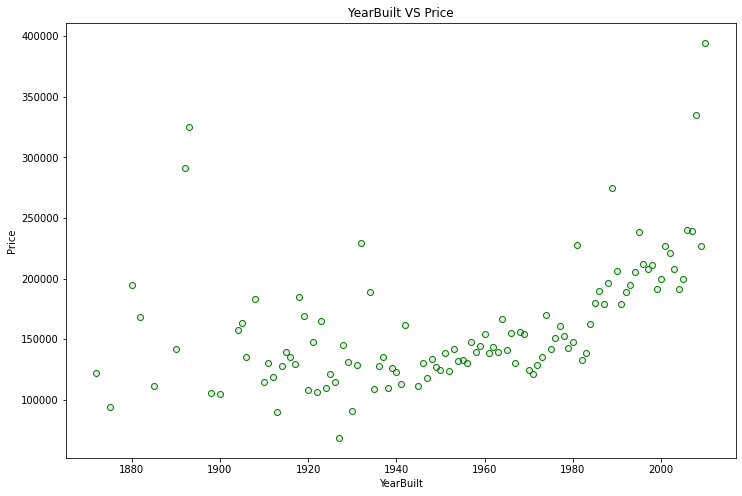

In [11]:
# With the scatter plot I will explore the trend of the prices with respect to dates 
plt.figure(figsize = (12, 8))
col = 'YearBuilt'

temp = df[df[col].isin((df[col].value_counts()).index)][[col,'SalePrice']]
temp= temp.groupby(col).median().sort_values('SalePrice').reset_index()
plt.ylabel('Price')
plt.xlabel('YearBuilt')
plt.title('YearBuilt VS Price')
plt.scatter(temp[col], temp.SalePrice, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='green');


- From the figure, we observe that the trend of the House Prices is increasing slowly from 1880 to 1970 then it begins to increase faster after 1970.

# Modeling

In [12]:
# Split the data between features (X) and the target feature (y)
X = modified_df.drop('SalePrice', axis=1)
y = modified_df['SalePrice']

In [13]:
# Spliting the data into trin, test split for training and testing the model
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1021, 235), (439, 235), (1021,), (439,))

In [14]:
# training RandomForestRegressor model then test the result with r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

regr = RandomForestRegressor()
regr.fit(x_train, y_train)

y_pred_train= regr.predict(x_train)
y_pred_val= regr.predict(x_val)


print("r2 train: " , r2_score(y_train, y_pred_train))
print("r2 val: " , r2_score(y_val, y_pred_val))

r2 train:  0.9768542691398145
r2 val:  0.8929750740769489


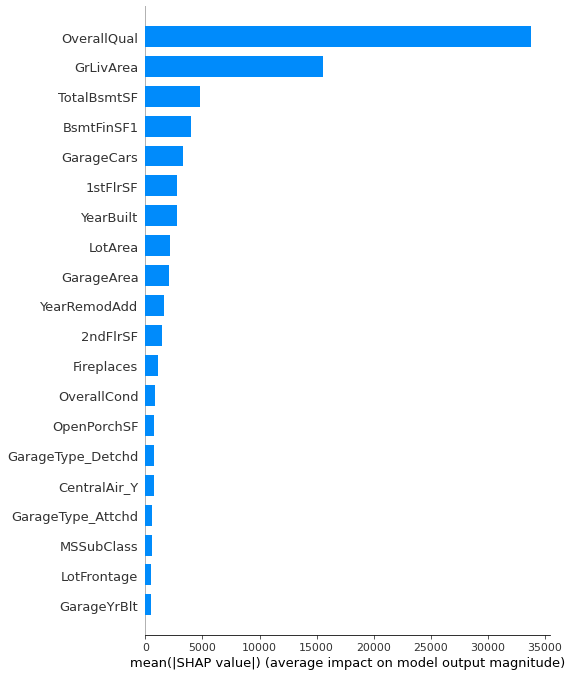

In [19]:
# getting the most important features used by the model
import shap
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(x_val)
shap.summary_plot(shap_values, x_val, plot_type="bar")